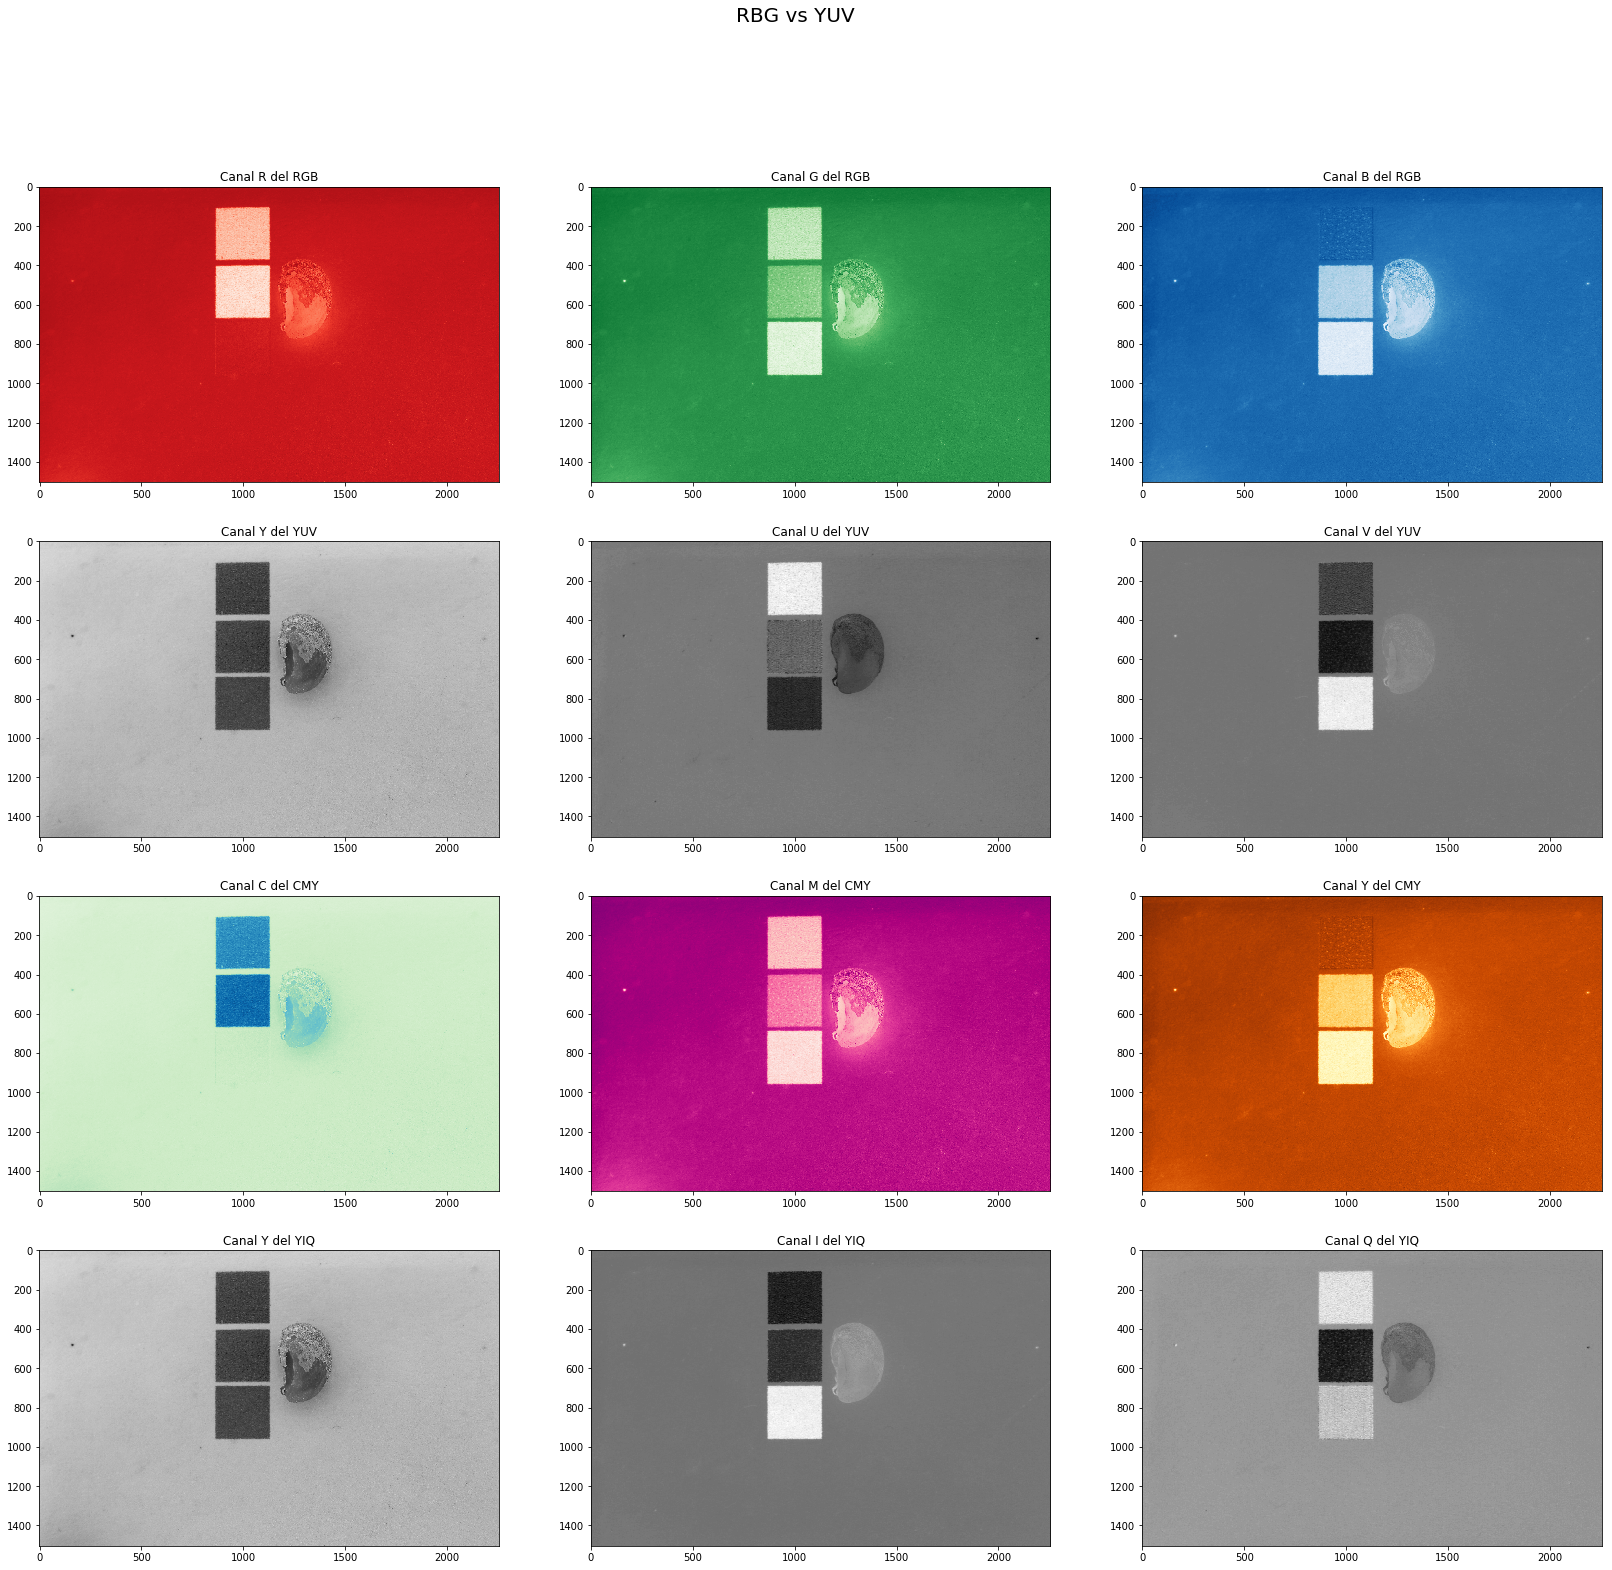

In [104]:
%matplotlib inline 
#Magic para mostrar imágenes en Jupyter usando matplotlib
#Segm
import numpy as np
import cv2
import matplotlib.pyplot as plt

#Leer la imagen y pasarla a RGB
img = cv2.imread("res/cfa.jpg", cv2.IMREAD_COLOR)

img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]
#Separar el espacio de color YUV en sus canales individuales
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

img_Yu = img_yuv[:,:,0]
img_U =  img_yuv[:,:,1]
img_V = img_yuv[:,:,2]

#Se obtiene cada canal del espacio CMY con una transformación lineal
#a los canales R, G y B
img_C = 255 - img_rgb[:,:,0]
img_M = 255 - img_rgb[:,:,1]
img_Y = 255 - img_rgb[:,:,2]

#Se obtienen los canales YIQ mediante una transformación lineal
img_Yi = 0.299*img_R + 0.587*img_G + 0.114*img_B
img_I = 0.596*img_R - 0.274*img_G - 0.322*img_B
img_Q = 0.211*img_R - 0.523*img_G + 0.312*img_B

#Mostrar y comparar imágenes
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6),(ax7, ax8, ax9),(ax10, ax11, ax12)) = plt.subplots(4,3, figsize=(28, 25))
fig.suptitle('RBG vs YUV', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(img_R, cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(img_G, cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(img_B, cmap='Blues', aspect='auto')
ax4.set_title('Canal Y del YUV')
ax4.imshow(img_Yu, cmap='gray', aspect='auto')
ax5.set_title('Canal U del YUV')
ax5.imshow(img_U, cmap='gray', aspect='auto')
ax6.set_title('Canal V del YUV')
ax6.imshow(img_V, cmap='gray', aspect='auto')
ax7.set_title('Canal C del CMY')
ax7.imshow(img_C, cmap='GnBu', aspect='auto')
ax8.set_title('Canal M del CMY')
ax8.imshow(img_G, cmap='RdPu', aspect='auto')
ax9.set_title('Canal Y del CMY')
ax9.imshow(img_B, cmap='YlOrBr', aspect='auto')
ax10.set_title('Canal Y del YIQ')
ax10.imshow(img_Yi, cmap='gray', aspect='auto')
ax11.set_title('Canal I del YIQ')
ax11.imshow(img_I, cmap='gray', aspect='auto')
ax12.set_title('Canal Q del YIQ')
ax12.imshow(img_Q, cmap='gray', aspect='auto')

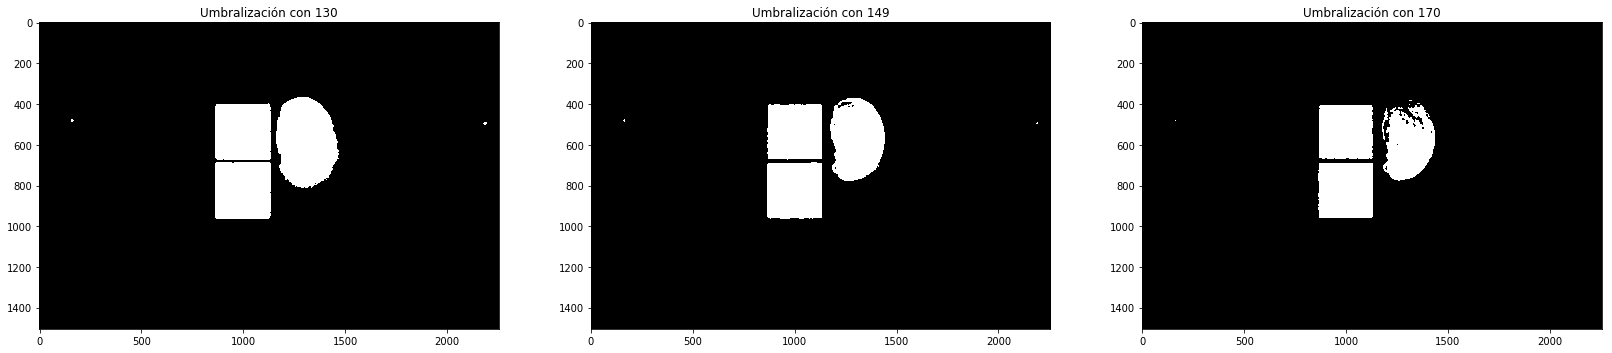

In [105]:

#Función de lectura rápida de imágenes a color y en escala de grises
def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
        return None

img = img_Y

#Definir tamaño del kernel
k_size = 10
#aplicar filtro de suavizado
img = cv2.blur(img, (k_size,k_size))

#Realizar disintos threshold a la imagen a partir de distintos valores mínimos

a = 130
b = 149
c = 170
thresholded1 = img > a
thresholded2 = img > b
thresholded3 = img > c

#Generar un subplot 1x3 para mostrar las umbralizaciones y compararlas
fig, ax = plt.subplots(1,3, figsize=(28, 15))
ax[0].set_title('Umbralización con '+ str(a))
ax[0].imshow(thresholded1, cmap="gray");
ax[1].set_title('Umbralización con '+ str(b))
ax[1].imshow(thresholded2, cmap="gray");
ax[2].set_title('Umbralización con '+ str(c))
ax[2].imshow(thresholded3, cmap="gray");

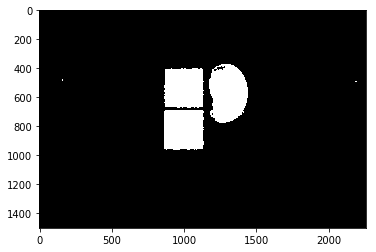

In [106]:
#el caso mas util es la umbralización con 149
imgplot = plt.imshow(thresholded2,cmap='gray') 
plt.show() 
#falta eliminar los cuadrados :/